In [31]:
import cv2
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [32]:
train_dir = '../input/arabic-hwr-ai-pro-intake1/train/'
test_dir = '../input/arabic-hwr-ai-pro-intake1/test/'

files1,files2 = [],[]

files1.extend(glob.glob(train_dir + '*.' + 'png')) 
files1 = sorted(files1)
train_images = np.array([cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in files1])

train_labels = np.genfromtxt('../input/arabic-hwr-ai-pro-intake1/train.csv',delimiter=',',dtype=int,skip_header=1)[:,1]

files2.extend(glob.glob(test_dir + '*.' + 'png'))
files2 = sorted(files2)
test_images = np.array([cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in files2])
test_labels = np.genfromtxt('../input/arabic-hwr-ai-pro-intake1/test.csv',delimiter=',',dtype=int,skip_header=1)


In [33]:
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
train_labels = encoder.fit_transform(train_labels.reshape(-1,1))

In [35]:
from sklearn.model_selection import train_test_split
train,validation,y_train,y_val = train_test_split(train_images,train_labels, test_size=0.3, random_state=42,shuffle=True)

In [36]:
train = train/255
validation = validation/255

In [129]:
model = Sequential()
model.add(Conv2D(64,kernel_size=5,activation='relu',input_shape=(32,32,1),padding='same'))
model.add(Conv2D(128,kernel_size=5,activation='relu',padding='same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.3))
model.add(Conv2D(128,kernel_size=5,activation='relu',padding='same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.3))
model.add(Conv2D(256,kernel_size=5,activation='relu',padding='same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.4))
model.add(Conv2D(256,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.4))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(28,activation='softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
training = model.fit(train,y_train ,epochs = 30,batch_size=256,validation_data=(validation,y_val))

Epoch 1/30
37/37 [==============================] - 3s 54ms/step - loss: 3.3148 - accuracy: 0.0390 - val_loss: 3.2876 - val_accuracy: 0.0350
Epoch 2/30
37/37 [==============================] - 2s 50ms/step - loss: 3.1237 - accuracy: 0.0719 - val_loss: 3.0057 - val_accuracy: 0.1066
Epoch 3/30
37/37 [==============================] - 2s 50ms/step - loss: 2.5402 - accuracy: 0.1541 - val_loss: 2.1390 - val_accuracy: 0.2822
Epoch 4/30
37/37 [==============================] - 2s 51ms/step - loss: 1.7915 - accuracy: 0.3482 - val_loss: 1.2887 - val_accuracy: 0.5692
Epoch 5/30
37/37 [==============================] - 2s 50ms/step - loss: 1.0620 - accuracy: 0.5949 - val_loss: 0.7112 - val_accuracy: 0.7512
Epoch 6/30
37/37 [==============================] - 2s 50ms/step - loss: 0.7275 - accuracy: 0.7307 - val_loss: 0.5075 - val_accuracy: 0.8400
Epoch 7/30
37/37 [==============================] - 2s 50ms/step - loss: 0.5707 - accuracy: 0.7866 - val_loss: 0.4072 - val_accuracy: 0.8807
Epoch 8/30
37

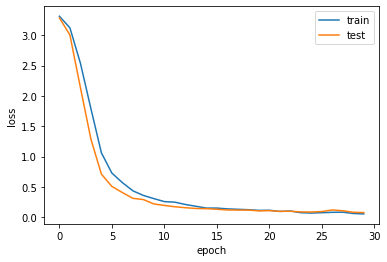

In [130]:
fig1 = plt.figure()
plt.plot(range(30),training.history['loss'])
plt.plot(range(30),training.history['val_loss'])

plt.ylabel('loss',fontsize=10)
plt.xlabel('epoch',fontsize=10)
plt.legend(['train', 'test'], loc='upper right',fontsize=10)
plt.show()

In [131]:
accuracy = model.evaluate(train, y_train)[1]
print('trainAccuracy: %.2f' % (accuracy*100)+"%")

accuracy = model.evaluate(validation, y_val)[1]
print('val Accuracy: %.2f' % (accuracy*100)+"%")

294/294 [==============================] - 1s 4ms/step - loss: 0.0139 - accuracy: 0.9974
trainAccuracy: 99.74%
126/126 [==============================] - 1s 5ms/step - loss: 0.0767 - accuracy: 0.9774
val Accuracy: 97.74%


In [132]:
model.save("./model.h5")

In [133]:
from tensorflow.keras.models import load_model
x = load_model('model.h5')
x.evaluate(train,y_train)[1]

294/294 [==============================] - 2s 5ms/step - loss: 0.0139 - accuracy: 0.9974


0.9974489808082581